# Excercise 4

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

## a) Data analysis

In [15]:
weekly_sales = pd.read_csv("Task_4_weekly_sales_TurboPlasmaXPL.csv", names=["sales"])
weekly_sales.insert(loc=0, column='week', value=range(1, len(weekly_sales)+1))
weekly_sales.head()

,week,sales
0,1,43
1,2,57
2,3,10
3,4,64
4,5,62


### Plot of data
From the plot you can quickly see that the sales of the TurboPlasmaXML are very unstable in the beginning of the year and start to stabilize at around week 15.
A cause for this can be that the market introduction of the TurboPlasmaXML wasn't very smooth and supply problems could have held back sales, especially in week two and ten. 

To handle the data I would suggest to cut off the first 15 weeks since they a very high standard deviation and are not representative for the whole dataset.  
Also one could argue that the sales will contiune on the stabilized level and most likely will not drop to the levels seen in the first weeks.

In addition to that the data becomes a lot easier to handle since there is no trend and no sesonality in the sales data anymore, whereas there was a strong trend in the first 14 weeks.

Text(0.5, 1.0, 'Sales of TurboPlasmaXML per Week')

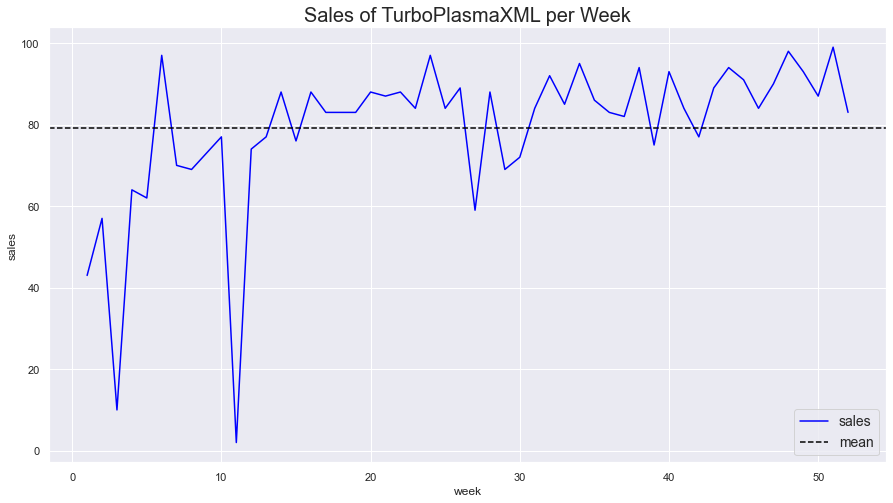

In [16]:
graph = sns.lineplot(data=weekly_sales, x="week", y="sales", color = "blue", label="sales")
graph.axhline(weekly_sales.sales.mean(), color = "black", label="mean", linestyle="--")
graph.legend(loc=4, prop={'size': 14})
graph.set_title("Sales of TurboPlasmaXML per Week", size=20)

In [17]:
print(f"The average weekly sales are: {weekly_sales.sales.mean()} with a standard deviation of {weekly_sales.sales.std()}")
print(f"For weeks [1,14] the average weekly sales are: {weekly_sales.sales[:14].mean()} with a standard deviation of {weekly_sales.sales[:14].std()}")
print(f"For weeks [15,52] the average weekly sales are: {weekly_sales.sales[14:].mean()} with a standard deviation of {weekly_sales.sales[14:].std()}")

The average weekly sales are: 79.21153846153847 with a standard deviation of 18.672971489652994
For weeks [1,14] the average weekly sales are: 61.642857142857146 with a standard deviation of 26.920415881051895
For weeks [15,52] the average weekly sales are: 85.6842105263158 with a standard deviation of 8.134362425082182


## b) Forecasting
As argued in a) we will use the data from week 15 and onwards to create and test our forecasts.
We will look at moving average and at exponential smoothing forecasts and compare them with different error measures.

In [18]:
weekly_sales_cut_avg = weekly_sales[14:]
weekly_sales_cut_exp = weekly_sales[14:]
weekly_sales_cut_avg.head(10)

,week,sales
14,15,76
15,16,88
16,17,83
17,18,83
18,19,83
19,20,88
20,21,87
21,22,88
22,23,84
23,24,97


### Moving Average
For the moving average forecasts we will compare the forecasts for n = 1 to n = 10.

In [19]:
range_n = range(1,11)

def add_rolling_average_forecast(df, n):
    fc = df.sales.rolling(n).mean().shift(periods=1)
    df.insert(loc=len(df.columns), column=f"moving_average_n={n}", value=fc)
    
for n in range_n:
    add_rolling_average_forecast(weekly_sales_cut_avg,n)

weekly_sales_cut_avg.head(20)

,week,sales,moving_average_n=1,moving_average_n=2,moving_average_n=3,moving_average_n=4,moving_average_n=5,moving_average_n=6,moving_average_n=7,moving_average_n=8,moving_average_n=9,moving_average_n=10
14,15,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,16,88,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,17,83,88.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,18,83,83.0,85.5,82.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,19,83,83.0,83.0,84.666667,82.50,NaN,NaN,NaN,NaN,NaN,NaN
19,20,88,83.0,83.0,83.000000,84.25,82.6,NaN,NaN,NaN,NaN,NaN
20,21,87,88.0,85.5,84.666667,84.25,85.0,83.500000,NaN,NaN,NaN,NaN
21,22,88,87.0,87.5,86.000000,85.25,84.8,85.333333,84.000000,NaN,NaN,NaN
22,23,84,88.0,87.5,87.666667,86.50,85.8,85.333333,85.714286,84.500,NaN,NaN
23,24,97,84.0,86.0,86.333333,86.75,86.0,85.500000,85.142857,85.500,84.444444,NaN


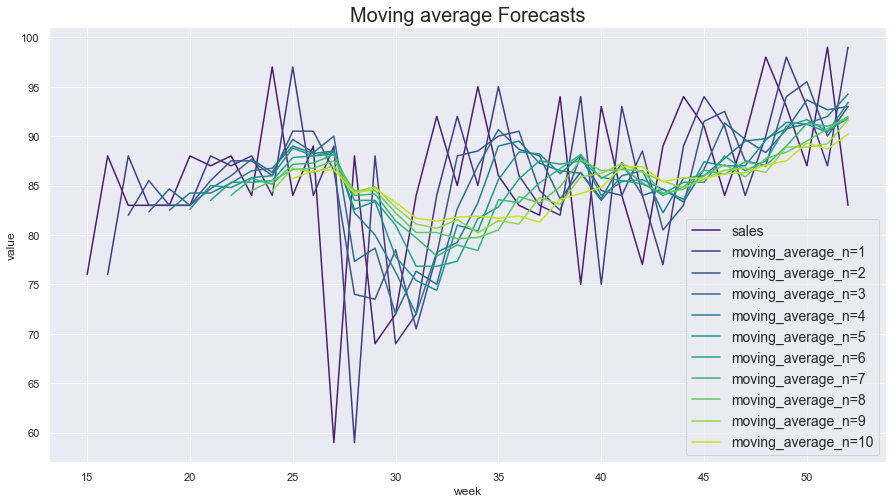

In [20]:
graph = sns.lineplot(data=pd.melt(weekly_sales_cut_avg, ['week']), x="week", y="value", hue="variable", palette="viridis")
graph.set_title("Moving average Forecasts", size=20)
graph.legend(loc=4, prop={'size': 14})

### Simple Exponential Smoothing

In [21]:
range_alpha = np.arange(0.1, 1, 0.1)

def add_exponential_smoothing_forecast(df, a):
    fc = df.sales.ewm(alpha=a, adjust=False).mean().shift(periods=1, fill_value=df.sales.iloc[0])
    df.insert(loc=len(df.columns), column=f"exp_smoothing_α={a.round(1)}", value=fc)

for a in range_alpha:
    add_exponential_smoothing_forecast(df=weekly_sales_cut_exp, a=a)

weekly_sales_cut_exp.head(20)

,week,sales,exp_smoothing_α=0.1,exp_smoothing_α=0.2,exp_smoothing_α=0.3,exp_smoothing_α=0.4,exp_smoothing_α=0.5,exp_smoothing_α=0.6,exp_smoothing_α=0.7,exp_smoothing_α=0.8,exp_smoothing_α=0.9
14,15,76,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
15,16,88,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
16,17,83,77.200000,78.400000,79.600000,80.800000,82.000000,83.200000,84.400000,85.600000,86.800000
17,18,83,77.780000,79.320000,80.620000,81.680000,82.500000,83.080000,83.420000,83.520000,83.380000
18,19,83,78.302000,80.056000,81.334000,82.208000,82.750000,83.032000,83.126000,83.104000,83.038000
19,20,88,78.771800,80.644800,81.833800,82.524800,82.875000,83.012800,83.037800,83.020800,83.003800
20,21,87,79.694620,82.115840,83.683660,84.714880,85.437500,86.005120,86.511340,87.004160,87.500380
21,22,88,80.425158,83.092672,84.678562,85.628928,86.218750,86.602048,86.853402,87.000832,87.050038
22,23,84,81.182642,84.074138,85.674993,86.577357,87.109375,87.440819,87.656021,87.800166,87.905004
23,24,97,81.464378,84.059310,85.172495,85.546414,85.554688,85.376328,85.096806,84.760033,84.390500


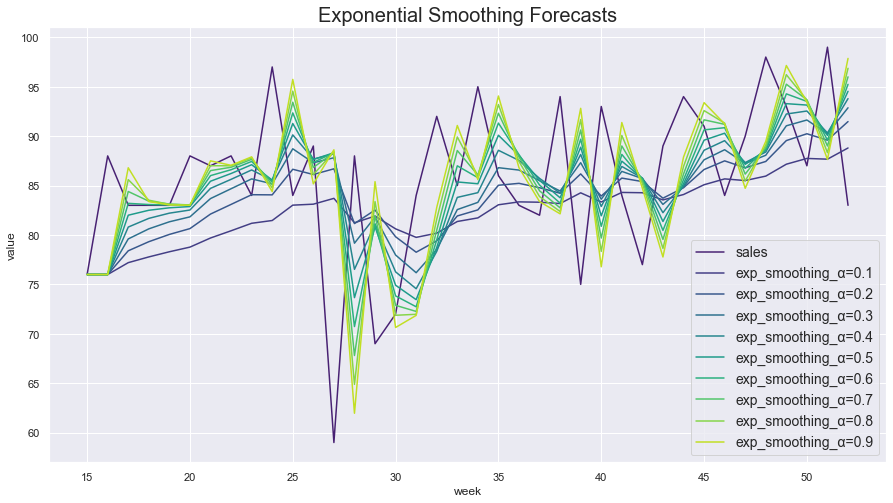

In [22]:
graph = sns.lineplot(data=pd.melt(weekly_sales_cut_exp, ['week']), x="week", y="value", hue="variable", palette="viridis")
graph.set_title("Exponential Smoothing Forecasts", size=20)
graph.legend(loc=4, prop={'size': 14})

### Error Measures
To compare the different forecasting methods we will take a loot at three differetn error measures, namely MAD, RMSE and MAPE.

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [24]:
weekly_sales_cut_forecasts = pd.merge(left=weekly_sales_cut_avg, right=weekly_sales_cut_exp, how='inner').drop("week", axis=1)
methods = list(weekly_sales_cut_forecasts.columns[1:])
weekly_sales_cut_forecasts = np.array(weekly_sales_cut_forecasts).transpose()
sales_cut = weekly_sales_cut_forecasts[0]
sales_cut = np.tile(sales_cut, (len(methods),1))
weekly_sales_cut_forecasts = weekly_sales_cut_forecasts[1:]

In [25]:
MAE = list()
RMSE  = list()
MAPE = list()

for sales, forecast in zip(sales_cut, weekly_sales_cut_forecasts):
    sales = sales[~np.isnan(forecast)]
    forecast = forecast[~np.isnan(forecast)]
    MAE.append(mean_absolute_error(y_true=sales, y_pred=forecast))
    RMSE.append(mean_squared_error(y_true=sales, y_pred=forecast, squared=False))
    MAPE.append(mean_absolute_percentage_error(y_true=sales, y_pred=forecast))

error_measures = pd.DataFrame([MAE,RMSE, MAPE],columns=methods, index=["MAE", "RMSE", "MAPE"])
error_measures


,moving_average_n=1,moving_average_n=2,moving_average_n=3,moving_average_n=4,moving_average_n=5,moving_average_n=6,moving_average_n=7,moving_average_n=8,moving_average_n=9,moving_average_n=10,exp_smoothing_α=0.1,exp_smoothing_α=0.2,exp_smoothing_α=0.3,exp_smoothing_α=0.4,exp_smoothing_α=0.5,exp_smoothing_α=0.6,exp_smoothing_α=0.7,exp_smoothing_α=0.8,exp_smoothing_α=0.9
MAE,9.054054,6.986111,6.809524,6.875000,7.224242,7.281250,7.267281,7.325000,7.521073,7.060714,7.056665,6.724399,6.717276,6.772939,6.873199,7.113938,7.480122,7.869331,8.336798
RMSE,11.485596,8.957074,8.854198,8.708832,9.252289,9.125856,9.318835,9.285237,9.439395,9.033213,8.643921,8.468393,8.554294,8.727068,8.970919,9.286060,9.674622,10.140162,10.689193
MAPE,0.109629,0.084760,0.083165,0.084438,0.088669,0.089669,0.089527,0.090419,0.092561,0.087825,0.084507,0.081687,0.081873,0.082551,0.083678,0.086430,0.090683,0.095242,0.100880


After we calculated the error measures for every method we have to find the best method to use for our future forecasts.

In [26]:
print("Best Forecast per error measure:")
print(error_measures.idxmin(axis=1))

Best Forecast per error measure:
MAE     exp_smoothing_α=0.3
RMSE    exp_smoothing_α=0.2
MAPE    exp_smoothing_α=0.2
dtype: object


I would recommend to use a exponential smoothing forecast with an alpha of 0.2.  